This is a test notebook to refresh my data analysis skills in Python.


In [74]:
#########################################################################################
# 500 Cities Data Analysis - basic code
# Written by Michelle Schmitz, originally in Jupyter notebooks and then in Python code.
# Initially written on 02 March 2019
#########################################################################################

In [75]:
# Importing in pandas and numpy libraries to handle data management aspects of the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('max_columns', 50)
%matplotlib inline

In [76]:
# NOT INCLUDING THE SQLITE LIBRARY IN MY FINAL ANALYSIS, BUT I DID WANT TO KEEP IT HERE FOR FUTURE REFERENCE
# and the sqlite3 library so I can select certain rows and output them as certain objects to manipulate
# also including the Error library so I can see what's wrong if I'm writing SQL queries

#from pandas.io import sql
#import sqlite3
#from sqlite3 import Error

In [77]:
# reading in the 500 Cities data set, created by the CDC's Division of Population Health (2018 release)
#
# note - this is NOT related to my current position at CDC - I just know about this dataset, and I love its concept

In [78]:
### IN CASE IF I WANT TO READ IN THE CSV DOWNLOADED INTO MY COMPUTER

# reading in the dataset and looking at the first few rows.
# changing my user directory to be Downloads

#%cd C:\Users\mmsch\Downloads

#data_500_cities = pd.read_csv('500_Cities__Local_Data_for_Better_Health__2018_release.csv')


In [79]:
### IN CASE IF I WANT TO READ IN THE CSV URL THAT'S ON THE INTERNET - takes longer but more applicable/more sharable

# Reading in the CSV of the 500 cities dataset

## This is the original dataset's link:
# read.csv("https://catalog.data.gov/dataset/500-cities-local-data-for-better-health-b32fd/resource/8a49a1f7-4fcc-49a6-acb5-fcd3c0796782")

#url = 'https://data.cdc.gov/api/views/6vp6-wxuq/rows.csv?accessType=DOWNLOAD'
url = ('https://data.cdc.gov/api/views/6vp6-wxuq/rows.csv')

data_500_cities = pd.read_csv(url)

# Looking at the first few rows of the dataset and getting information about the dataset - 
# just to make sure I got the correct dataset!
data_500_cities.head(3)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,AgeAdjPrv,Age-adjusted prevalence,14.6,14.3,14.9,NaN,NaN,308745538,NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance
1,2016,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,11.6,11.3,11.8,NaN,NaN,308745538,NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance
2,2016,US,United States,NaN,US,BRFSS,Health Outcomes,59,Arthritis among adults aged >=18 Years,%,AgeAdjPrv,Age-adjusted prevalence,23.0,22.8,23.2,NaN,NaN,308745538,NaN,HLTHOUT,ARTHRITIS,NaN,NaN,Arthritis


In [80]:
# doing more specific descriptive checks for all of the data - and the numeric data in particular
data_500_cities.info() #basic information about the dataset
data_500_cities.dtypes
data_500_cities.describe() 
#the above is descriptive statistics for all numeric variables 
# (including FIPS codes, which doesn't make a ton of sense - but would be interesting to map out!)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810103 entries, 0 to 810102
Data columns (total 24 columns):
Year                          810103 non-null int64
StateAbbr                     810103 non-null object
StateDesc                     810103 non-null object
CityName                      810047 non-null object
GeographicLevel               810103 non-null object
DataSource                    810103 non-null object
Category                      810103 non-null object
UniqueID                      810103 non-null object
Measure                       810103 non-null object
Data_Value_Unit               810103 non-null object
DataValueTypeID               810103 non-null object
Data_Value_Type               810103 non-null object
Data_Value                    787311 non-null float64
Low_Confidence_Limit          787311 non-null float64
High_Confidence_Limit         787311 non-null float64
Data_Value_Footnote_Symbol    22794 non-null object
Data_Value_Footnote           22794 non-

,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,CityFIPS,TractFIPS
count,810103.000000,787311.000000,787311.000000,787311.000000,8.101030e+05,8.100470e+05,7.820470e+05
mean,2015.856779,31.224884,29.488202,32.979995,3.202413e+04,2.606307e+06,2.592907e+10
std,0.350299,25.815357,25.341553,26.245761,2.568489e+06,1.686183e+06,1.675378e+10
min,2015.000000,0.200000,0.100000,0.200000,1.000000e+00,1.500300e+04,1.073000e+09
25%,2016.000000,9.800000,8.700000,11.000000,2.405000e+03,6.813440e+05,8.001009e+09
50%,2016.000000,22.800000,20.500000,25.100000,3.632000e+03,2.622000e+06,2.608100e+10
75%,2016.000000,46.000000,43.100000,49.200000,5.040000e+03,4.055000e+06,4.010911e+10
max,2016.000000,95.500000,94.100000,96.500000,3.087455e+08,5.613900e+06,5.602100e+10


In [81]:
# I'm most interested in the Measures variable - but I want to see what the categorical values are 
# of the Measures variable - so I'm creating a series object to look at this

#Col_Measure = ['Measure','Data_Value'] # only selecting out the Measure column
Col_Measure = ['CityName','StateAbbr','DataValueTypeID','Measure','Data_Value','Low_Confidence_Limit','High_Confidence_Limit','CityFIPS','TractFIPS','PopulationCount'] 
print(Col_Measure)

['CityName', 'StateAbbr', 'DataValueTypeID', 'Measure', 'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'CityFIPS', 'TractFIPS', 'PopulationCount']


In [82]:
# Pivot for Age-Adjusted Prevalence (updated)
#pivot = pd.pivot_table(data_500_cities[Col_Measure], values=['Low_Confidence_Limit','Data_Value','High_Confidence_Limit'], index='Measure', margins=False, dropna=False, margins_name='All',aggfunc={'Low_Confidence_Limit': np.mean, 'Data_Value': np.mean,'High_Confidence_Limit': np.mean})
pivot1 = pd.pivot_table(data_500_cities[Col_Measure][(data_500_cities.DataValueTypeID == 'AgeAdjPrv') & (data_500_cities.StateAbbr == 'US')], values=['Low_Confidence_Limit','Data_Value','High_Confidence_Limit'], index='Measure', margins=False, dropna=False, aggfunc={'Low_Confidence_Limit': np.mean, 'Data_Value': np.mean,'High_Confidence_Limit': np.mean})
pivot1
#print(pivot1)

,Data_Value,High_Confidence_Limit,Low_Confidence_Limit
Measure,,,
All teeth lost among adults aged >=65 Years,15.0,15.4,14.6
Arthritis among adults aged >=18 Years,23.0,23.2,22.8
Binge drinking among adults aged >=18 Years,18.0,18.2,17.7
Cancer (excluding skin cancer) among adults aged >=18 Years,5.9,6.0,5.8
Cholesterol screening among adults aged >=18 Years,75.2,75.5,74.9
Chronic kidney disease among adults aged >=18 Years,2.7,2.8,2.6
Chronic obstructive pulmonary disease among adults aged >=18 Years,6.0,6.1,5.8
Coronary heart disease among adults aged >=18 Years,5.8,5.9,5.7
Current asthma among adults aged >=18 Years,8.8,9.0,8.7


In [83]:
#attempting pivot #2 - this time of values ONLY for the US
#pivot2 = pd.pivot_table(data_500_cities[Col_Measure][data_500_cities.StateAbbr == 'US'], index='Measure', values='Data_Value', margins=False, dropna=False)
#print(pivot2)

# Pivot for Crude Prevalence (updated)
pivot2 = pd.pivot_table(data_500_cities[Col_Measure][(data_500_cities.DataValueTypeID == 'CrdPrv') & (data_500_cities.StateAbbr == 'US')], values=['Low_Confidence_Limit','Data_Value','High_Confidence_Limit'], index='Measure', margins=False, dropna=False, aggfunc={'Low_Confidence_Limit': np.mean, 'Data_Value': np.mean,'High_Confidence_Limit': np.mean})
pivot2
#print(pivot2)

,Data_Value,High_Confidence_Limit,Low_Confidence_Limit
Measure,,,
All teeth lost among adults aged >=65 Years,14.5,14.9,14.1
Arthritis among adults aged >=18 Years,25.4,25.6,25.1
Binge drinking among adults aged >=18 Years,16.9,17.2,16.7
Cancer (excluding skin cancer) among adults aged >=18 Years,6.6,6.7,6.4
Cholesterol screening among adults aged >=18 Years,77.0,77.3,76.7
Chronic kidney disease among adults aged >=18 Years,2.9,3.0,2.9
Chronic obstructive pulmonary disease among adults aged >=18 Years,6.5,6.6,6.4
Coronary heart disease among adults aged >=18 Years,6.6,6.7,6.5
Current asthma among adults aged >=18 Years,8.9,9.0,8.7


In [84]:
# Want to display the data for US overall, and averaged for all counties together

## pivot 1

#converting back into another data frame to display data together
flattened1 = pd.DataFrame(pivot1.to_records())
with_new_index1 = flattened1.set_index('Measure')

with_new_index1.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.AgeAdjPrv').replace('High_Confidence_Limit','High_CL.AgeAdjPrv').replace('Data_Value','Data_Value.AgeAdjPrv') \
                           for hdr in with_new_index1.columns]
#print(with_new_index1)
with_new_index1

## pivot 2

#converting back into another data frame to display data together
flattened2 = pd.DataFrame(pivot2.to_records())
with_new_index2 = flattened2.set_index('Measure')
#print(with_new_index2)

#with_new_index2.columns = [hdr.replace("Data_Value","Data_Value.US") \
#                          for hdr in with_new_index2.columns] #for old version - since deprecated

with_new_index2.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.CrdPrv').replace('High_Confidence_Limit','High_CL.CrdPrv').replace('Data_Value','Data_Value.CrdPrv') \
                           for hdr in with_new_index2.columns]

with_new_index2
#print(with_new_index2)

,Data_Value.CrdPrv,High_CL.CrdPrv,Low_CL.CrdPrv
Measure,,,
All teeth lost among adults aged >=65 Years,14.5,14.9,14.1
Arthritis among adults aged >=18 Years,25.4,25.6,25.1
Binge drinking among adults aged >=18 Years,16.9,17.2,16.7
Cancer (excluding skin cancer) among adults aged >=18 Years,6.6,6.7,6.4
Cholesterol screening among adults aged >=18 Years,77.0,77.3,76.7
Chronic kidney disease among adults aged >=18 Years,2.9,3.0,2.9
Chronic obstructive pulmonary disease among adults aged >=18 Years,6.5,6.6,6.4
Coronary heart disease among adults aged >=18 Years,6.6,6.7,6.5
Current asthma among adults aged >=18 Years,8.9,9.0,8.7


In [85]:
# JOINING THE TWO PIVOT TABLES TOGETHER IN CASE IF I WANT TO OUTPUT A LARGE OUTPUT TABLE
# dropping a good reference on different types of joins here -- http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/

US_data_table = pd.merge(with_new_index1, with_new_index2, on='Measure', how='outer')
US_data_table
US_data_table_ft = pd.DataFrame(US_data_table.to_records())
US_data_table_ft

,Measure,Data_Value.AgeAdjPrv,High_CL.AgeAdjPrv,Low_CL.AgeAdjPrv,Data_Value.CrdPrv,High_CL.CrdPrv,Low_CL.CrdPrv
0,All teeth lost among adults aged >=65 Years,15.0,15.4,14.6,14.5,14.9,14.1
1,Arthritis among adults aged >=18 Years,23.0,23.2,22.8,25.4,25.6,25.1
2,Binge drinking among adults aged >=18 Years,18.0,18.2,17.7,16.9,17.2,16.7
3,Cancer (excluding skin cancer) among adults ag...,5.9,6.0,5.8,6.6,6.7,6.4
4,Cholesterol screening among adults aged >=18 Y...,75.2,75.5,74.9,77.0,77.3,76.7
5,Chronic kidney disease among adults aged >=18 ...,2.7,2.8,2.6,2.9,3.0,2.9
6,Chronic obstructive pulmonary disease among ad...,6.0,6.1,5.8,6.5,6.6,6.4
7,Coronary heart disease among adults aged >=18 ...,5.8,5.9,5.7,6.6,6.7,6.5
8,Current asthma among adults aged >=18 Years,8.8,9.0,8.7,8.9,9.0,8.7
9,Current lack of health insurance among adults ...,14.6,14.9,14.3,11.6,11.8,11.3


In [86]:
# reordering columns so that it makes sense in a comparison framework
US_data_table_index = US_data_table_ft.set_index('Measure')
US_data_table_ro = US_data_table_index[['Low_CL.CrdPrv','Data_Value.CrdPrv','High_CL.CrdPrv','Low_CL.AgeAdjPrv','Data_Value.AgeAdjPrv','High_CL.AgeAdjPrv']]
US_data_table_ro

,Low_CL.CrdPrv,Data_Value.CrdPrv,High_CL.CrdPrv,Low_CL.AgeAdjPrv,Data_Value.AgeAdjPrv,High_CL.AgeAdjPrv
Measure,,,,,,
All teeth lost among adults aged >=65 Years,14.1,14.5,14.9,14.6,15.0,15.4
Arthritis among adults aged >=18 Years,25.1,25.4,25.6,22.8,23.0,23.2
Binge drinking among adults aged >=18 Years,16.7,16.9,17.2,17.7,18.0,18.2
Cancer (excluding skin cancer) among adults aged >=18 Years,6.4,6.6,6.7,5.8,5.9,6.0
Cholesterol screening among adults aged >=18 Years,76.7,77.0,77.3,74.9,75.2,75.5
Chronic kidney disease among adults aged >=18 Years,2.9,2.9,3.0,2.6,2.7,2.8
Chronic obstructive pulmonary disease among adults aged >=18 Years,6.4,6.5,6.6,5.8,6.0,6.1
Coronary heart disease among adults aged >=18 Years,6.5,6.6,6.7,5.7,5.8,5.9
Current asthma among adults aged >=18 Years,8.7,8.9,9.0,8.7,8.8,9.0


In [128]:
#####################################################################################################################
# Now that I've presented the data in a nice-to-see way for the entire US - let's see what the distribution is of
# the PREVALENCES (both CRUDE and AGE-ADJUSTED) for all cities (n=500)
#####################################################################################################################

In [129]:
# Getting ALL PREVALENCES for all observations that ARE NOT the US summary
DF_Prev = data_500_cities[Col_Measure][(data_500_cities.StateAbbr != 'US')] 
#DF_Prev_ft = pd.DataFrame(DF_Prev.to_records())
#DF_Prev_ft.head()

# We have created a dataset for all of the prevalences that are not summed across the United States!

,index,CityName,StateAbbr,DataValueTypeID,Measure,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,CityFIPS,TractFIPS,PopulationCount
0,56,Birmingham,AL,AgeAdjPrv,Current lack of health insurance among adults ...,19.5,19.1,19.9,107000.0,NaN,212237
1,57,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,19.2,18.8,19.5,107000.0,NaN,212237
2,58,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,23.3,20.6,26.3,107000.0,1.073000e+09,3042
3,59,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,28.5,25.2,31.7,107000.0,1.073000e+09,2735
4,60,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,23.9,20.5,27.6,107000.0,1.073000e+09,3338


In [130]:
## However, we need to know how many observations are in each grouping.
# After all, age-adjusted prevalences are demographically adjusted based on age distributions from each crude population!
DF_Prev.groupby('DataValueTypeID').groups

{'AgeAdjPrv': Int64Index([     0,    100,    200,    303,    403,    504,    603,    704,
                804,    906,
             ...
             809868, 809886, 809904, 809923, 809941, 809959, 809976, 809994,
             810012, 810029],
            dtype='int64', length=14000),
 'CrdPrv': Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                  9,     10,
             ...
             810037, 810038, 810039, 810040, 810041, 810042, 810043, 810044,
             810045, 810046],
            dtype='int64', length=796047)}

In [131]:
## Based on our results, we have 14,000 lines of Age-Adjusted Prevalences, and 796,047 lines of Crude Prevalences.
# As age-adjusted prevalences are derived from mathematical models of crude prevalences, we will not be comparing
# these measures directly!

# I will split the prevalences dataset into crude and age-adjusted prevalences, before splitting them further 
# into each measure and recombining them. This reshapes the dataset so each Measure will have its own column,
# making it easier to compare across measures for future analyses.

In [164]:
# TO MAKE MY LIFE EASIER AFTER THE FACT - I will be creating a "short" Measure keyword and affixing it
# to the dataset before splitting it up.

#DF_Prev['Measure_Short'] = "HI" # the value for all rows as a preliminary start
DF_Prev['Measure_Short'] =  DF_Prev['Measure'] # the value for all rows as a preliminary start
DF_Prev.head()

,CityName,StateAbbr,DataValueTypeID,Measure,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,CityFIPS,TractFIPS,PopulationCount,Measure_Short
56,Birmingham,AL,AgeAdjPrv,Current lack of health insurance among adults ...,19.5,19.1,19.9,107000.0,NaN,212237,Current lack of health insurance among adults ...
57,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,19.2,18.8,19.5,107000.0,NaN,212237,Current lack of health insurance among adults ...
58,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,23.3,20.6,26.3,107000.0,1.073000e+09,3042,Current lack of health insurance among adults ...
59,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,28.5,25.2,31.7,107000.0,1.073000e+09,2735,Current lack of health insurance among adults ...
60,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,23.9,20.5,27.6,107000.0,1.073000e+09,3338,Current lack of health insurance among adults ...


# Now, I'll create a function to "shorten" the Measures!
# Except the syntax in ArcPy (in ArcGIS) and Python is actually different. :|

def renameMeasure(var1,var2):
    if var1 == "All teeth lost among adults aged >=65 Years": 
        return var2 = "TeethLost"
    elif var1 == "Arthritis among adults aged >=18 Years":
        return var2 = "Arthritis"
    elif var1 == "Binge drinking among adults aged >=18 Years":
        return var2 = "BingeDrink"
    elif var1 == "Cancer (excluding skin cancer) among adults aged >=18 Years":
        return var2 = "Cancer"
    elif var1 == "Cholesterol screening among adults aged >=18 Years":
        return var2 = "Cholesterol"
    elif var1 == "Chronic kidney disease among adults aged >=18 Years":
        return var2 = "KidneyDisease"
    elif var1 == "Chronic obstructive pulmonary disease among adults aged >=18 Years":
        return var2 = "COPD"
    elif var1 == "Coronary heart disease among adults aged >=18 Years":
        return var2 = "CHD"
    elif var1 == "Current asthma among adults aged >=18 Years":
        return var2 = "Asthma"
    elif var1 == "Current lack of health insurance among adults aged 18â€“64 Years":
        return var2 = "NoHealthIns"
    elif var1 == "Current smoking among adults aged >=18 Years":
        return var2 = "CurrSmoke"
    elif var1 == "Diagnosed diabetes among adults aged >=18 Years":
        return var2 = "Diabetes"
    elif var1 == "Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50â€“75 Years":
        return var2 = "FecBldTst"
    elif var1 == "High blood pressure among adults aged >=18 Years":
        return var2 = "HighBP"
    elif var1 == "High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years":
        return var2 = "HighChol"
    elif var1 == "Mammography use among women aged 50â€“74 Years":
        return var2 = "Mammography"
    elif var1 == "Mental health not good for >=14 days among adults aged >=18 Years":
        return var2 = "MentHlth"
    elif var1 == "No leisure-time physical activity among adults aged >=18 Years":
        return var2 = "NoPhysAct"
    elif var1 == "Obesity among adults aged >=18 Years":
        return var2 = "Obesity"
    elif var1 == "Older adult men aged >=65 Years who are up to date on a core set of clinical preventive services: Flu shot past Year, PPV shot ever, Colorectal cancer screening":
        return var2 = "OlderMen"
    elif var1 == "Older adult women aged >=65 Years who are up to date on a core set of clinical preventive services: Flu shot past Year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 Years":
        return var2 == "OlderWomen"
    elif var1 == "Papanicolaou smear use among adult women aged 21â€“65 Years":
        return var2 == "PapSmear"
    elif var1 == "Physical health not good for >=14 days among adults aged >=18 Years":
        return var2 == "PhysHlthBad"
    elif var1 == "Sleeping less than 7 hours among adults aged >=18 Years":
        return var2 == "SleepLittle"
    elif var1 == "Stroke among adults aged >=18 Years":
        return var2 == "Stroke"
    elif var1 == "Taking medicine for high blood pressure control among adults aged >=18 Years with high blood pressure"
        return var2 = "HtnMeds"
    elif var1 == "Visits to dentist or dental clinic among adults aged >=18 Years":
        return var2 = "DentalVisits"
    elif var1 == "Visits to doctor for routine checkup within the past Year among adults aged >=18 Years":
        return var2 = "DocVisits"
    else var2 = ""
    
renameMeasure(Measure,Measure_Short)

In [171]:
######### THIS IS WHAT I NEED HELP ON. #############

# Now, I'll create a function to 'shorten' the Measures!
# Except the syntax in ArcPy (in ArcGIS) and Python is actually different. :|

def renameMeasure(var1):
    if var1 == 'All teeth lost among adults aged >=65 Years': 
        return 'TeethLost'
    elif var1 == 'Arthritis among adults aged >=18 Years':
        return 'Arthritis'
    elif var1 == 'Binge drinking among adults aged >=18 Years':
        return 'BingeDrink'
    elif var1 == 'Cancer (excluding skin cancer) among adults aged >=18 Years':
        return 'Cancer'
    elif var1 == 'Cholesterol screening among adults aged >=18 Years':
        return 'Cholesterol'
    elif var1 == 'Chronic kidney disease among adults aged >=18 Years':
        return 'KidneyDisease'
    elif var1 == 'Chronic obstructive pulmonary disease among adults aged >=18 Years':
        return 'COPD'
    elif var1 == 'Coronary heart disease among adults aged >=18 Years':
        return 'CHD'
    elif var1 == 'Current asthma among adults aged >=18 Years':
        return 'Asthma'
    elif var1 == 'Current lack of health insurance among adults aged 18â€“64 Years':
        return 'NoHealthIns'
    elif var1 == 'Current smoking among adults aged >=18 Years':
        return 'CurrSmoke'
    elif var1 == 'Diagnosed diabetes among adults aged >=18 Years':
        return 'Diabetes'
    elif var1 == 'Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50â€“75 Years':
        return 'FecBldTst'
    elif var1 == 'High blood pressure among adults aged >=18 Years':
        return 'HighBP'
    elif var1 == 'High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years':
        return 'HighChol'
    elif var1 == 'Mammography use among women aged 50â€“74 Years':
        return 'Mammography'
    elif var1 == 'Mental health not good for >=14 days among adults aged >=18 Years':
        return 'MentHlth'
    elif var1 == 'No leisure-time physical activity among adults aged >=18 Years':
        return 'NoPhysAct'
    elif var1 == 'Obesity among adults aged >=18 Years':
        return 'Obesity'
    elif var1 == 'Older adult men aged >=65 Years who are up to date on a core set of clinical preventive services: Flu shot past Year, PPV shot ever, Colorectal cancer screening':
        return 'OlderMen'
    elif var1 == 'Older adult women aged >=65 Years who are up to date on a core set of clinical preventive services: Flu shot past Year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 Years':
        return var2 == 'OlderWomen'
    elif var1 == 'Papanicolaou smear use among adult women aged 21â€“65 Years':
        return var2 == 'PapSmear'
    elif var1 == 'Physical health not good for >=14 days among adults aged >=18 Years':
        return var2 == 'PhysHlthBad'
    elif var1 == 'Sleeping less than 7 hours among adults aged >=18 Years':
        return var2 == 'SleepLittle'
    elif var1 == 'Stroke among adults aged >=18 Years':
        return var2 == 'Stroke'
    elif var1 == 'Taking medicine for high blood pressure control among adults aged >=18 Years with high blood pressure':
        return 'HtnMeds'
    elif var1 == 'Visits to dentist or dental clinic among adults aged >=18 Years':
        return 'DentalVisits'
    elif var1 == 'Visits to doctor for routine checkup within the past Year among adults aged >=18 Years':
        return 'DocVisits'
    
renameMeasure(DF_Prev['Measure_Short'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# This is the correct syntax, as far as I can tell.
# Basically - for the new string, I'm replacing the old values with my new values

Measure_Short = DF_Prev['Measure_Short']

Measure = DF_Prev['Measure_Short']
Measure_Short = DF_Prev['Measure_Short']

Measure_Short = Measure.replace('All teeth lost among adults aged >=65 Years','TeethLost')
print(Measure_Short)
Measure_Short = Measure.replace('Arthritis among adults aged >=18 Years','Arthritis')
print(Measure_Short)
Measure_Short = Measure.replace('Binge drinking among adults aged >=18 Years','BingeDrink')
print(Measure_Short)
Measure_Short = Measure.replace('Cancer (excluding skin cancer) among adults aged >=18 Years','Cancer')
print(Measure_Short)
Measure_Short = Measure.replace('Cholesterol screening among adults aged >=18 Years','Cholesterol')
print(Measure_Short)
Measure_Short = Measure.replace('Chronic kidney disease among adults aged >=18 Years','KidneyDisease')
print(Measure_Short)
Measure_Short = Measure.replace('Chronic obstructive pulmonary disease among adults aged >=18 Years','COPD')
print(Measure_Short)
Measure_Short = Measure.replace('Coronary heart disease among adults aged >=18 Years','CHD')
print(Measure_Short)
Measure_Short = Measure.replace('Current asthma among adults aged >=18 Years','Asthma')
print(Measure_Short)
Measure_Short = Measure.replace('Current lack of health insurance among adults aged 18â€“64 Years','NoHealthIns')
print(Measure_Short)
Measure_Short = Measure.replace('Current smoking among adults aged >=18 Years','CurrSmoke')
print(Measure_Short)
Measure_Short = Measure.replace('Diagnosed diabetes among adults aged >=18 Years','Diabetes')
print(Measure_Short)
Measure_Short = Measure.replace('Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50â€“75 Years','FecBldTst')
print(Measure_Short)
Measure_Short = Measure.replace('High blood pressure among adults aged >=18 Years','HighBP')
print(Measure_Short)
Measure_Short = Measure.replace('High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years','HighChol')
print(Measure_Short)
Measure_Short = Measure.replace('Mammography use among women aged 50â€“74 Years','Mammography')
print(Measure_Short)
Measure_Short = Measure.replace('Mental health not good for >=14 days among adults aged >=18 Years','MentHlth')
print(Measure_Short)
Measure_Short = Measure.replace('No leisure-time physical activity among adults aged >=18 Years','NoPhysAct')
print(Measure_Short)
Measure_Short = Measure.replace('Obesity among adults aged >=18 Years','Obesity')
print(Measure_Short)
Measure_Short = Measure.replace('Older adult men aged >=65 Years who are up to date on a core set of clinical preventive services: Flu shot past Year, PPV shot ever, Colorectal cancer screening','OlderMen')
print(Measure_Short)
Measure_Short = Measure.replace('Older adult women aged >=65 Years who are up to date on a core set of clinical preventive services: Flu shot past Year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 Years', 'OlderWomen')
print(Measure_Short)
Measure_Short = Measure.replace('Papanicolaou smear use among adult women aged 21â€“65 Years', 'PapSmear')
print(Measure_Short)
Measure_Short = Measure.replace('Physical health not good for >=14 days among adults aged >=18 Years', 'PhysHlthBad')
print(Measure_Short)
Measure_Short = Measure.replace('Sleeping less than 7 hours among adults aged >=18 Years', 'SleepLittle')
print(Measure_Short)
Measure_Short = Measure.replace('Stroke among adults aged >=18 Years', 'Stroke')
print(Measure_Short)
Measure_Short = Measure.replace('Taking medicine for high blood pressure control among adults aged >=18 Years with high blood pressure','HtnMeds')
print(Measure_Short)
Measure_Short = Measure.replace('Visits to dentist or dental clinic among adults aged >=18 Years','DentalVisits')
print(Measure_Short)
Measure_Short = Measure.replace('Visits to doctor for routine checkup within the past Year among adults aged >=18 Years','DocVisits')
print(Measure_Short)

In [163]:
#Checking the first few observations to see if this actually occurred.

#pd.crosstab(DF_Prev['Measure'],DF_Prev['Measure_Short'], rownames=DF_Prev['Measure'], colnames=DF_Prev['Measure_Short'])
#DF_Prev['Measure_Short'] =  DF_Prev['Measure'] # the value for all rows as a preliminary start
DF_Prev.head()

,CityName,StateAbbr,DataValueTypeID,Measure,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,CityFIPS,TractFIPS,PopulationCount,Measure_Short
56,Birmingham,AL,AgeAdjPrv,Current lack of health insurance among adults ...,19.5,19.1,19.9,107000.0,NaN,212237,Current lack of health insurance among adults ...
57,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,19.2,18.8,19.5,107000.0,NaN,212237,Current lack of health insurance among adults ...
58,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,23.3,20.6,26.3,107000.0,1.073000e+09,3042,Current lack of health insurance among adults ...
59,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,28.5,25.2,31.7,107000.0,1.073000e+09,2735,Current lack of health insurance among adults ...
60,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,23.9,20.5,27.6,107000.0,1.073000e+09,3338,Current lack of health insurance among adults ...


In [132]:
# Getting the CRUDE PREVALENCE for all observations that ARE NOT the US summary
DF_CrdPrev = data_500_cities[Col_Measure][(data_500_cities.DataValueTypeID == 'CrdPrv') & (data_500_cities.StateAbbr != 'US')]
DF_CrdPrev
#DF_CrdPrev_ft = pd.DataFrame(DF_CrdPrev.to_records())
#DF_CrdPrev_ft.head()

,index,CityName,StateAbbr,DataValueTypeID,Measure,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,CityFIPS,TractFIPS,PopulationCount
0,57,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,19.2,18.8,19.5,107000.0,NaN,212237
1,58,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,23.3,20.6,26.3,107000.0,1.073000e+09,3042
2,59,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,28.5,25.2,31.7,107000.0,1.073000e+09,2735
3,60,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,23.9,20.5,27.6,107000.0,1.073000e+09,3338
4,61,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,25.8,22.0,29.9,107000.0,1.073000e+09,2864


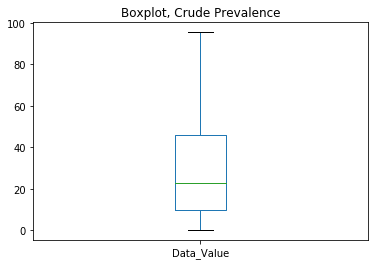

In [133]:
# Here is a boxplot of the Crude Prevalences, based on the dataset created above.

fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot, Crude Prevalence')
#pd.DataFrame(DF_CrdPrev_ft.Data_Value).boxplot(grid=False)
pd.DataFrame(DF_CrdPrev.Data_Value).boxplot(grid=False)

In [134]:
# Getting the AGE-ADJUSTED PREVALENCE for all observations that ARE NOT the US summary
DF_AgeAdjPrev = data_500_cities[Col_Measure][(data_500_cities.DataValueTypeID == 'AgeAdjPrv') & (data_500_cities.StateAbbr != 'US')]
DF_AgeAdjPrev
#DF_AgeAdjPrev_ft = pd.DataFrame(DF_AgeAdjPrev.to_records())
#DF_AgeAdjPrev_ft.head()

,index,CityName,StateAbbr,DataValueTypeID,Measure,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,CityFIPS,TractFIPS,PopulationCount
0,56,Birmingham,AL,AgeAdjPrv,Current lack of health insurance among adults ...,19.5,19.1,19.9,107000.0,NaN,212237
1,156,Birmingham,AL,AgeAdjPrv,Arthritis among adults aged >=18 Years,29.3,29.1,29.4,107000.0,NaN,212237
2,256,Birmingham,AL,AgeAdjPrv,Binge drinking among adults aged >=18 Years,13.0,13.0,13.1,107000.0,NaN,212237
3,359,Birmingham,AL,AgeAdjPrv,High blood pressure among adults aged >=18 Years,44.1,43.9,44.2,107000.0,NaN,212237
4,459,Birmingham,AL,AgeAdjPrv,Taking medicine for high blood pressure contro...,70.1,70.0,70.2,107000.0,NaN,212237


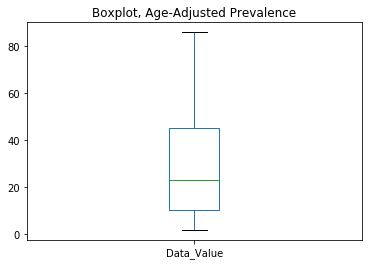

In [135]:
# BOXPLOT OF AGE-ADJUSTED PREVALENCE (which is adjusted based on all of the crude prevalences)
fig2, ax2 = plt.subplots()
ax2.set_title('Boxplot, Age-Adjusted Prevalence')
#pd.DataFrame(DF_AgeAdjPrev_ft.Data_Value).boxplot(grid=False)
pd.DataFrame(DF_AgeAdjPrev.Data_Value).boxplot(grid=False)

In [145]:
## Breaking up the CRUDE PREVALENCES dataset by each measure!

# Looking at the number of observations per Measure grouping

measure_groups = DF_CrdPrev.groupby('Measure').groups
measure_groups

{'All teeth lost among adults aged >=65 Years': Int64Index([  2753,   2754,   2755,   2756,   2757,   2758,   2759,   2760,
               2761,   2762,
             ...
             810093, 810094, 810095, 810096, 810097, 810098, 810099, 810100,
             810101, 810102],
            dtype='int64', length=28099),
 'Arthritis among adults aged >=18 Years': Int64Index([   157,    158,    159,    160,    161,    162,    163,    164,
                165,    166,
             ...
             809625, 809626, 809627, 809628, 809629, 809630, 809631, 809632,
             809633, 809634],
            dtype='int64', length=28504),
 'Binge drinking among adults aged >=18 Years': Int64Index([   257,    258,    259,    260,    261,    262,    263,    264,
                265,    266,
             ...
             809643, 809644, 809645, 809646, 809647, 809648, 809649, 809650,
             809651, 809652],
            dtype='int64', length=28504),
 'Cancer (excluding skin cancer) among adults ag

In [152]:
gb = DF_CrdPrev.groupby('Measure')  
gb.groups.keys()

dict_keys(['All teeth lost among adults aged >=65 Years', 'Arthritis among adults aged >=18 Years', 'Binge drinking among adults aged >=18 Years', 'Cancer (excluding skin cancer) among adults aged >=18 Years', 'Cholesterol screening among adults aged >=18 Years', 'Chronic kidney disease among adults aged >=18 Years', 'Chronic obstructive pulmonary disease among adults aged >=18 Years', 'Coronary heart disease among adults aged >=18 Years', 'Current asthma among adults aged >=18 Years', 'Current lack of health insurance among adults aged 18–64 Years', 'Current smoking among adults aged >=18 Years', 'Diagnosed diabetes among adults aged >=18 Years', 'Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50–75 Years', 'High blood pressure among adults aged >=18 Years', 'High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years', 'Mammography use among women aged 50–74 Years', 'Mental health not good for >=14 days among adults aged >=18 Yea

In [150]:
# Breaking Up the Dataset for each Measure.

[gb.get_group(x) for x in gb.groups]

[          CityName StateAbbr DataValueTypeID  \
 2753    Birmingham        AL          CrdPrv   
 2754    Birmingham        AL          CrdPrv   
 2755    Birmingham        AL          CrdPrv   
 2756    Birmingham        AL          CrdPrv   
 2757    Birmingham        AL          CrdPrv   
 2758    Birmingham        AL          CrdPrv   
 2759    Birmingham        AL          CrdPrv   
 2760    Birmingham        AL          CrdPrv   
 2761    Birmingham        AL          CrdPrv   
 2762    Birmingham        AL          CrdPrv   
 2763    Birmingham        AL          CrdPrv   
 2764    Birmingham        AL          CrdPrv   
 2765    Birmingham        AL          CrdPrv   
 2766    Birmingham        AL          CrdPrv   
 2767    Birmingham        AL          CrdPrv   
 2768    Birmingham        AL          CrdPrv   
 2769    Birmingham        AL          CrdPrv   
 2770    Birmingham        AL          CrdPrv   
 2771    Birmingham        AL          CrdPrv   
 2772    Birmingham 